## This code is to find out the different of each epoch and batch size combination

In [30]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [31]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/vgg13/fashion_mnist/'
data_path2 = parent_path / 'Data/vgg13/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /root/GreenAI/Cloud/4090/code
The parent path is: /root/GreenAI/Cloud/4090
The data path is: /root/GreenAI/Cloud/4090/Data/vgg13/fashion_mnist
The data path is: /root/GreenAI/Cloud/4090/Data/vgg13/cifar100


### extract data

In [32]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [33]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E20_B256_R0'] ['E20_B256_R0']
The folder list is: ['E20_B256_R0']
The common folders are: ['E20_B256_R0'] ['E20_B256_R0']


### analysis data

#### find the data in same epoch and batch size

In [34]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /root/GreenAI/Cloud/4090/Data/vgg13/fashion_mnist/E20_B256_R0 /root/GreenAI/Cloud/4090/Data/vgg13/cifar100/E20_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy'] 
 ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy']


In [35]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [36]:
LayersName = ['S0_C0', 'S0_R1', 'S0_C2', 'S0_R3', 'S0_M4', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_C0', 'S2_R1', 'S2_C2', 'S2_R3', 'S2_M4', 'S3_C0', 'S3_R1', 'S3_C2', 'S3_R3', 'S3_M4', 'S4_C0', 'S4_R1', 'S4_C2', 'S4_R3', 'S4_M4', 'F5', 'L6', 'R7', 'D8', 'L9', 'R10', 'D11', 'L12']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 39


##### fashionMNIST

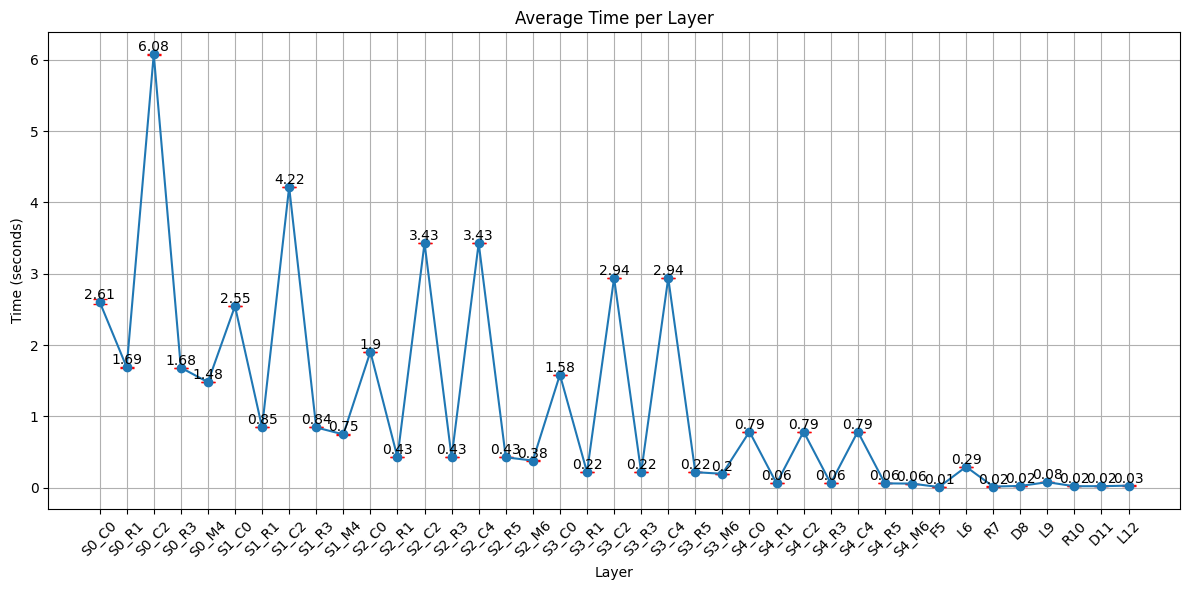

In [37]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [38]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'C' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock
IncepBlockIndex = IncepBlockIndex
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S0_C0', 'S0_C2', 'S1_C0', 'S1_C2', 'S2_C0', 'S2_C2', 'S2_C4', 'S3_C0', 'S3_C2', 'S3_C4', 'S4_C0', 'S4_C2', 'S4_C4']
The inception block indexes are [0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]


In [39]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_f[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[2.77835488 2.59843349 2.5987699  2.60391593 2.59844375 2.59848547
  2.60277772 2.59888291 2.59749389 2.59876561 2.59890509 2.59840465
  2.597574   2.59840465 2.5979979  2.60319972 2.59839725 2.59843278
  2.59933829 2.59924245]
 [6.08278298 6.07538652 6.07898974 6.07547784 6.07782054 6.08316302
  6.08532381 6.07292819 6.07955289 6.07829618 6.06976676 6.07106686
  6.07311583 6.06977582 6.06840444 6.07275987 6.07523417 6.0740118
  6.08048558 6.07373142]
 [2.54847956 2.54543114 2.54597759 2.54620457 2.5456574  2.54580903
  2.54663444 2.54582453 2.54550529 2.54556537 2.54630947 2.54548335
  2.54555964 2.54529834 2.54525447 2.54601908 2.54633331 2.54581118
  2.54632878 2.54608035]
 [4.21442628 4.21503544 4.21556306 4.2157557  4.21495986 4.21507645
  4.21470571 4.21504307 4.21426892 4.21464682 4.2148993  4.21444368
  4.21447182 4.21372223 4.215101   4.21517348 4.22323728 4.21542573
  4.21566463 4.21571398]
 [1.90560317 1.90529084 1.90427184 1.90470886 1.90418053 1.9041

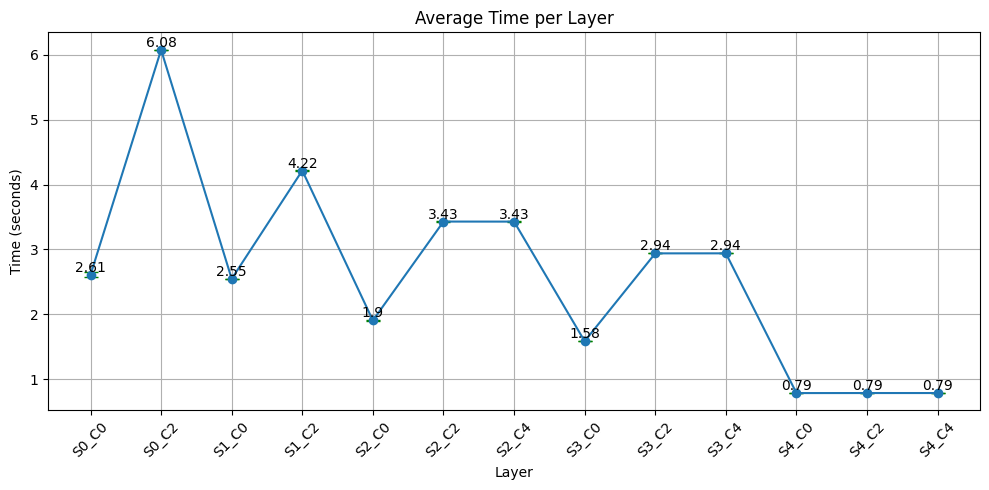

In [40]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

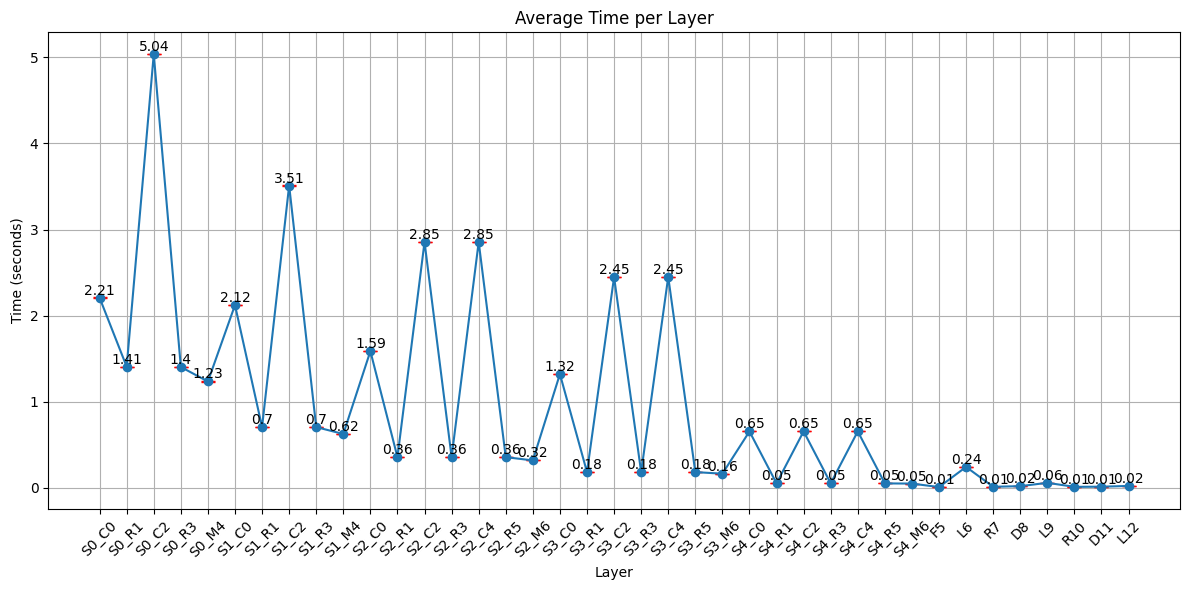

In [41]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [42]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'C' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock
IncepBlockIndex = IncepBlockIndex
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S0_C0', 'S0_C2', 'S1_C0', 'S1_C2', 'S2_C0', 'S2_C2', 'S2_C4', 'S3_C0', 'S3_C2', 'S3_C4', 'S4_C0', 'S4_C2', 'S4_C4']
The inception block indexes are [0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]


In [43]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_c[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[2.2151947  2.20554686 2.20442414 2.20517826 2.20516515 2.20514083
  2.20606494 2.20517755 2.20548677 2.20490122 2.20538759 2.21414566
  2.20483661 2.20527744 2.21109581 2.21383977 2.20504832 2.2054317
  2.20552731 2.20660186]
 [5.03855729 5.03617477 5.03537464 5.03478742 5.03588438 5.03406954
  5.03390598 5.03551769 5.03452253 5.03491116 5.0350976  5.0361867
  5.0361743  5.04654121 5.03746915 5.03732896 5.036731   5.03738022
  5.03754616 5.03627419]
 [2.12424612 2.12156343 2.12021708 2.12040949 2.12266946 2.12026644
  2.12138224 2.12152243 2.12031627 2.12095356 2.12868977 2.1210556
  2.12030578 2.11992574 2.12059474 2.12084126 2.12059355 2.12051058
  2.12099361 2.13020182]
 [3.51401353 3.5107975  3.50996017 3.51000524 3.51021504 3.51005602
  3.50981116 3.50957298 3.50963783 3.51040173 3.51032019 3.51062989
  3.5099268  3.50941396 3.51004648 3.51025486 3.5096488  3.51041961
  3.52066684 3.51075339]
 [1.58897448 1.58625388 1.58557129 1.58587289 1.58600116 1.585683

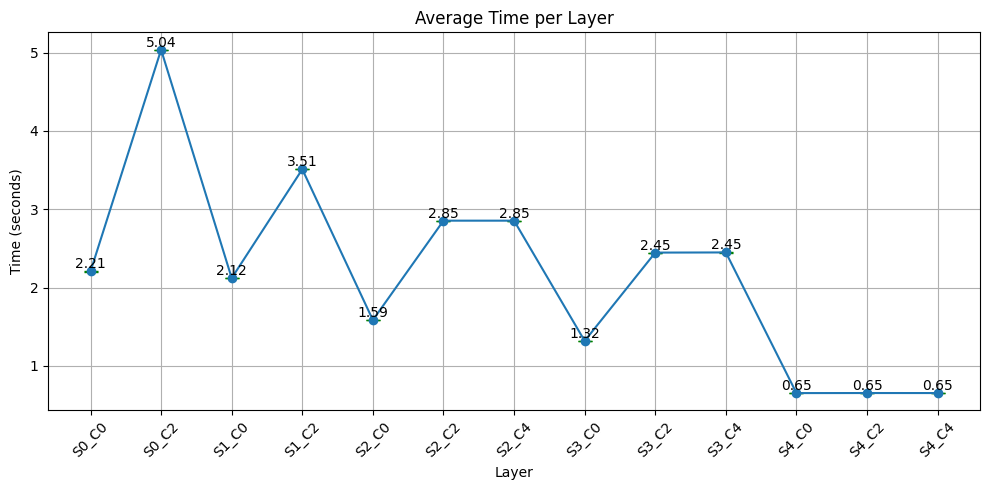

In [44]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [45]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

##### fashionMNIST

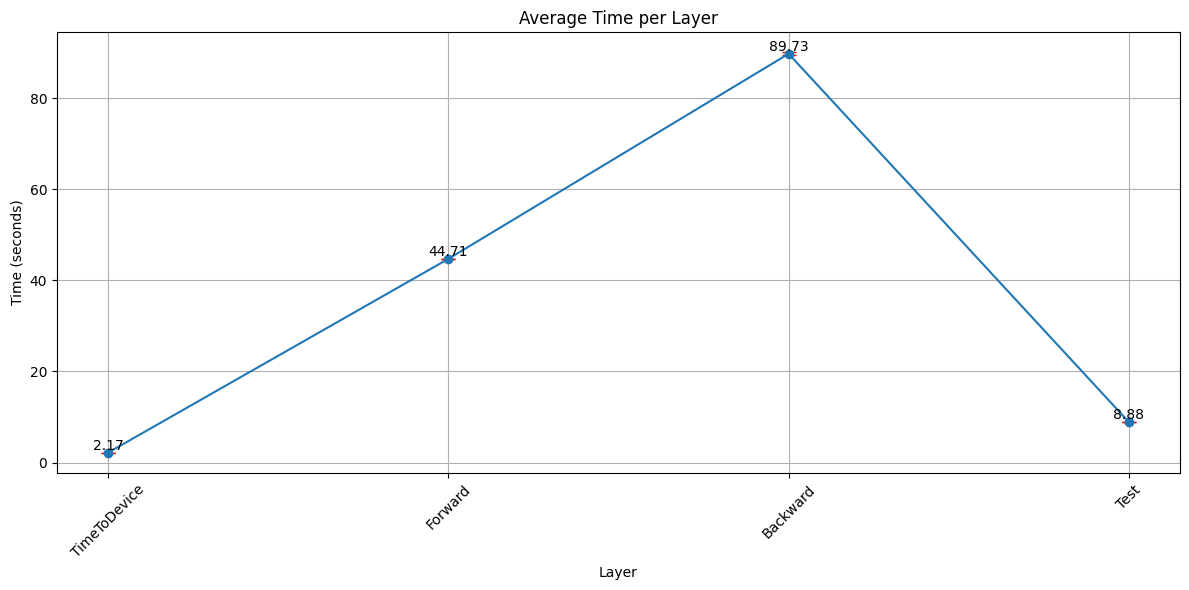

In [46]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

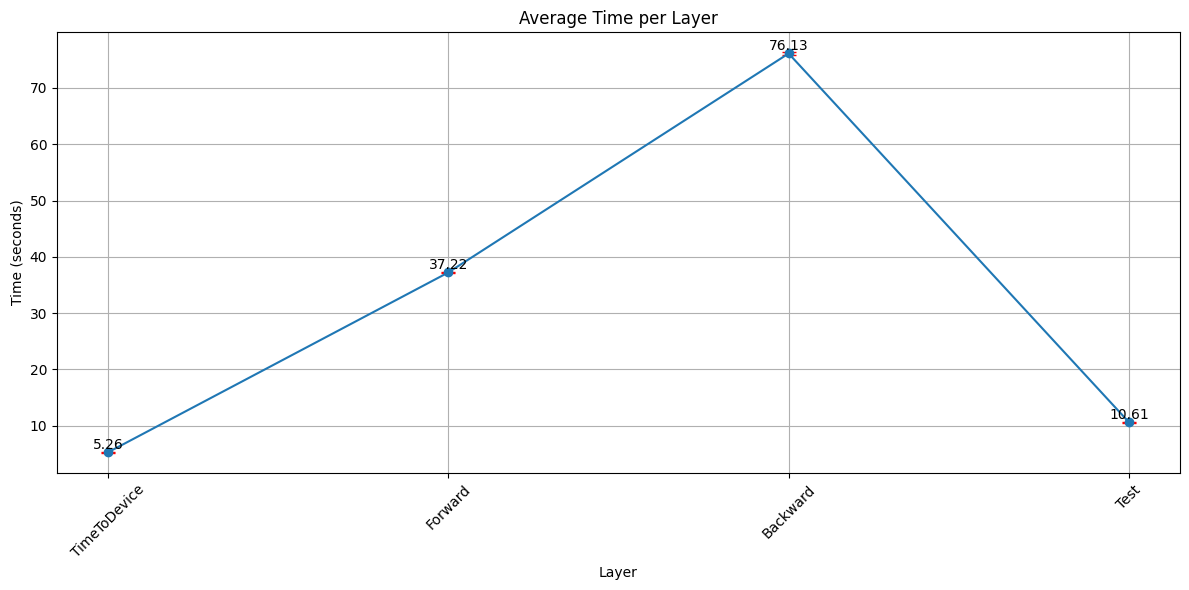

In [47]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [48]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [49]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

The total energy per epoch is: [[49063.39 50432.58 50613.05 50423.33 50679.02 50615.36 50703.06 50640.35
  50766.4  50746.38 50783.86 50804.15 50861.06 50628.58 50826.66 50797.02
  50809.64 50862.35 50819.34 50885.13]]
The average energy per epoch is: [[322.79 336.22 337.42 336.16 337.86 337.44 338.02 337.6  338.44 338.31
  338.56 338.69 339.07 337.52 338.84 338.65 338.73 339.08 338.8  339.23]]


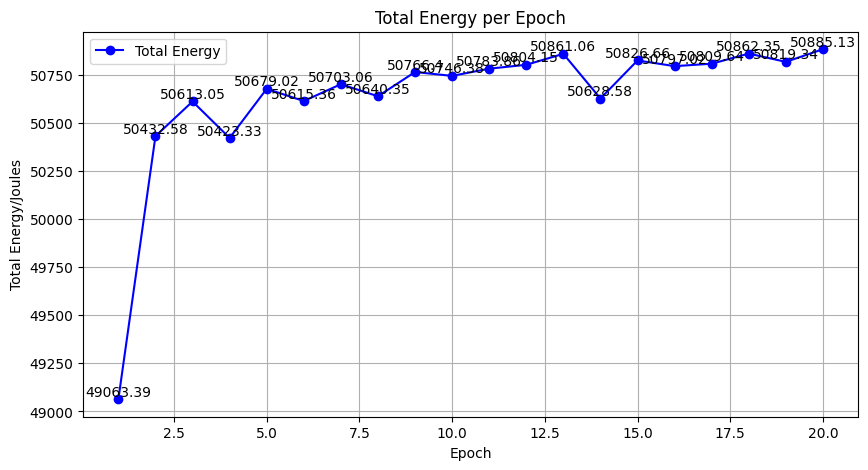

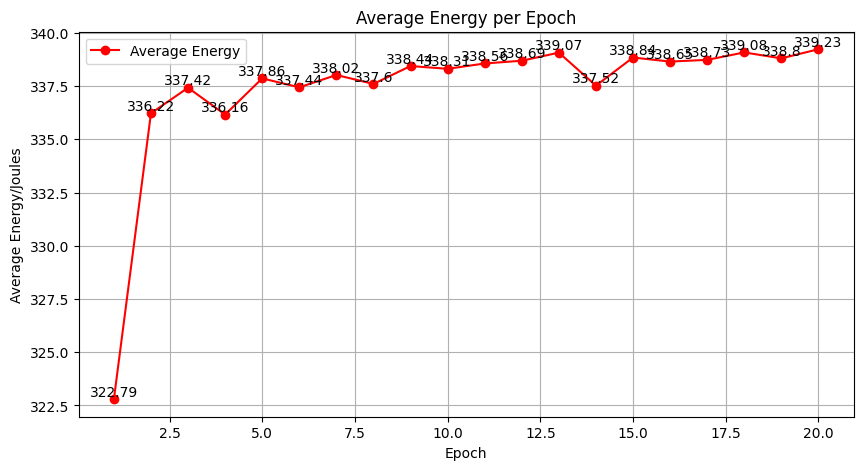

In [50]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [51]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 50638.0355, the standard deviation is: 383.16589735354813


In [52]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 337.3715, the standard deviation is: 3.4515420828956964


##### cifar100 

In [53]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [54]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[43818.63 44169.99 44220.02 44072.34 44186.35 44173.65 44400.08 44157.18
  44217.07 44333.21 44183.35 44245.33 44349.37 44329.55 44418.37 44331.02
  44218.95 44243.34 44524.01 44186.9 ]]
The average energy per epoch is: [[315.24 322.41 322.77 321.7  322.53 322.44 321.74 322.32 322.75 321.26
  322.51 322.96 323.72 323.57 321.87 321.24 322.77 322.94 322.64 322.53]]


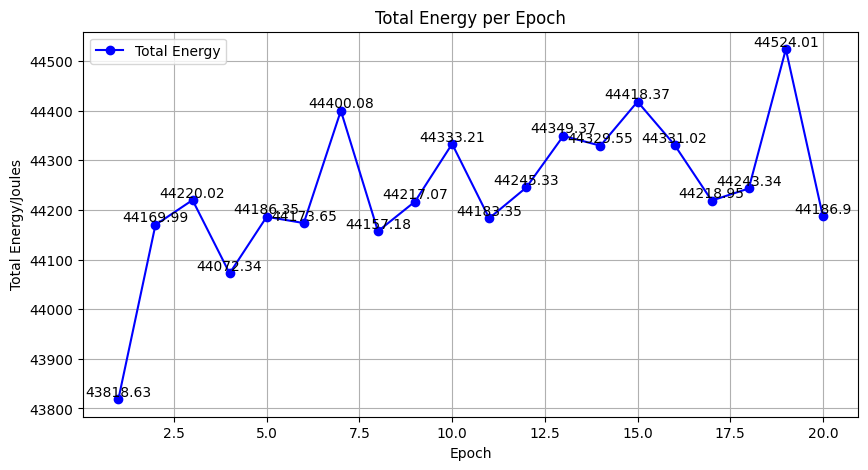

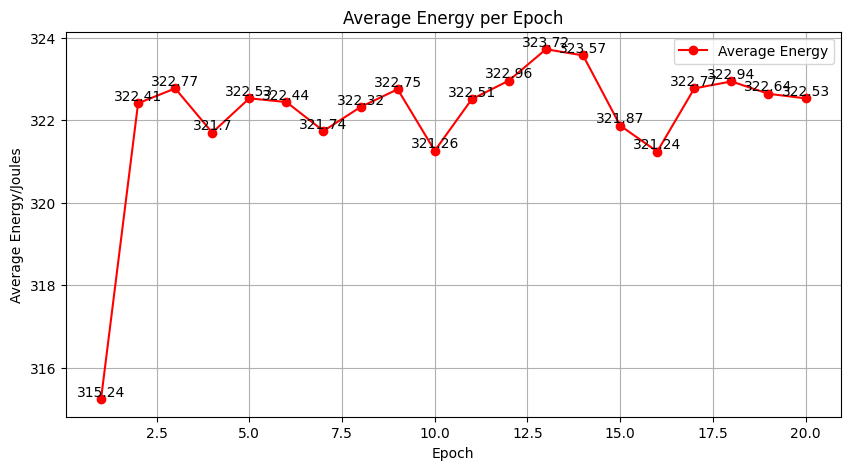

In [55]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

#### EpochTime

##### fashionMNIST

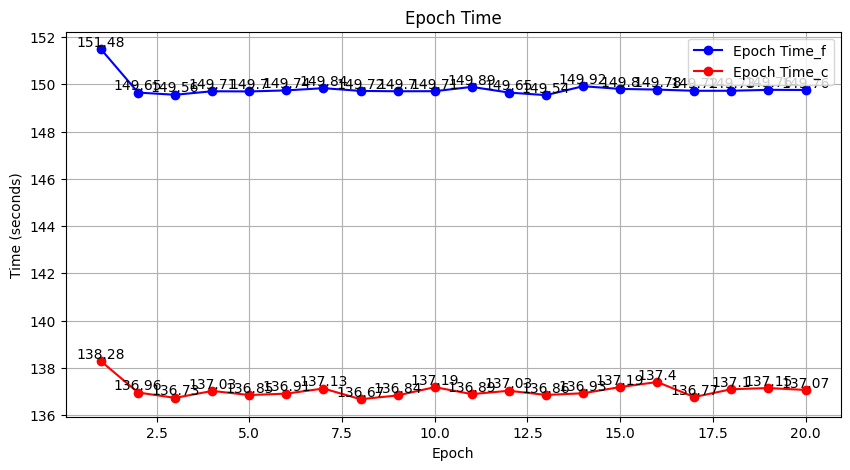

In [56]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [57]:
EpochTime_f

array([151.48352647, 149.64890742, 149.5563488 , 149.70551825,
       149.69695783, 149.74183774, 149.83595753, 149.71908617,
       149.70433259, 149.70787096, 149.88974118, 149.64929771,
       149.54035616, 149.91770411, 149.80428076, 149.77555919,
       149.72463369, 149.72605062, 149.76470041, 149.7589097 ])

##### cifar100

In [58]:
EpochTime_c

array([138.28097057, 136.95794511, 136.73208189, 137.02579808,
       136.85146284, 136.91203403, 137.12772202, 136.67458844,
       136.83501983, 137.18522525, 136.89118981, 137.03260493,
       136.8561666 , 136.92610717, 137.18934822, 137.40205431,
       136.767138  , 137.09888864, 137.14671946, 137.06700993])